In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_excel (r'C:\users\Hp\Documents\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name='Existing employees')

In [3]:
print(df.head())

   Emp ID  satisfaction_level  last_evaluation  number_project  \
0       1                0.38             0.53               2   
1       2                0.80             0.86               5   
2       3                0.11             0.88               7   
3       4                0.72             0.87               5   
4       5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years   dept  salary Whether_the_employee_has_left  
0                      0  sales     low                           yes  
1                      0  sales  medium                           yes  
2             

Visualise Data

Encode the data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df.iloc[:,10])

In [5]:
Y

array([1, 1, 1, ..., 1, 1, 1])

pd.DataFrame(Y,columns=['left'])

In [6]:
Attrition = pd.DataFrame(df)

In [7]:
Attrition

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Whether_the_employee_has_left
0,1,0.38,0.53,2,157,3,0,0,sales,low,yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,yes
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,yes
14995,14996,0.37,0.48,2,160,3,0,0,support,low,yes
14996,14997,0.37,0.53,2,143,3,0,0,support,low,yes
14997,14998,0.11,0.96,6,280,4,0,0,support,low,yes


Add the column that verifies if an employee left or not (Left)

In [8]:
Attrition.insert(11,'Left',Y)

In [9]:
Attrition

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Whether_the_employee_has_left,Left
0,1,0.38,0.53,2,157,3,0,0,sales,low,yes,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,yes,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,yes,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,yes,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,yes,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,yes,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,yes,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,yes,1


Group by the 'Left' column using the mean

In [10]:
Attrition.groupby('Left').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Left,,,,,,,,
0,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


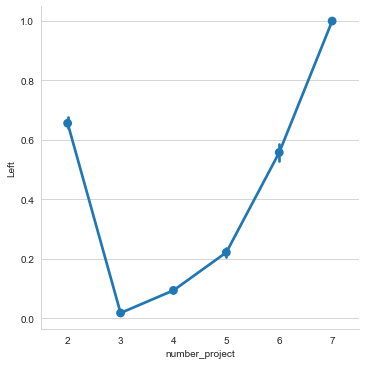

In [11]:
sns.factorplot(x='number_project',y='Left',data=Attrition)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


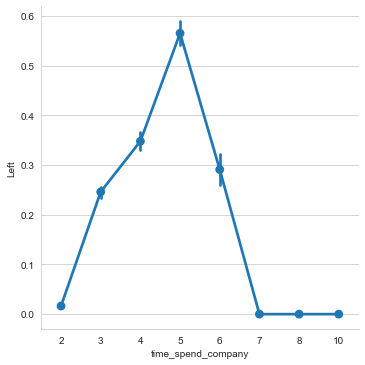

In [12]:
sns.factorplot(x='time_spend_company',y='Left',data=Attrition)

In [13]:
#create new DataFrames for the categorical variables
dept_dummies = pd.get_dummies(df['dept'])
salary_dummies = pd.get_dummies(df['salary'])

#lets take a look at the results
dept_dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [14]:
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [15]:
#set A as new DataFrame without the categorical variables
A = Attrition.drop(['Emp ID','dept','salary','Whether_the_employee_has_left'],axis=1)

In [16]:
A.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [17]:
#cancat the dummy variables together
Dummies = pd.concat([dept_dummies,salary_dummies],axis=1)

In [18]:
Dummies.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [19]:
#now concat the x DataFrame with the dummy variables
A = pd.concat([A,Dummies],axis=1)
A.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
#let's set up the dependent variable (Target Class) B
B = Attrition.Left
B.head()

0    1
1    1
2    1
3    1
4    1
Name: Left, dtype: int32

In [27]:
writer = pd.ExcelWriter('Dependent_Variable.xlsx')

B.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file


In [21]:
#to avoid multicollinearity from the dummy variables, we drop one column of each dummy variable
A = A.drop('hr',axis=1)
A = A.drop('high',axis=1)

#drop the 'Left' column so that B target makes sense
A = A.drop('Left',axis=1)

A.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [23]:
#Save to excel file

writer = pd.ExcelWriter('Independent_Variables.xlsx')

A.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file


In [28]:
B.head()

#flatten the array
B = np.ravel(B)

B

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
log_model = LogisticRegression()
log_model.fit(A,B)
log_model.score(A,B)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8023201546769785

In [30]:
# the mean of the target variable correspond to the percentage of those employees who left
B.mean()

0.2380825388359224

Our model got a 80% accuracy rating. taking the mean of the target variable gave 24%, which gives the percentage of employees who left the company. it therefore means that if our model just simply guessed that the employee would not leave, it would have been 76% accuracy.

we would now check the coefficients of our model to check what seemed to be the stronger predictors.

In [31]:
coeff = DataFrame(zip(A.columns, np.transpose(log_model.coef_)))

In [32]:
coeff

,0,1
0,satisfaction_level,[-4.142617831493608]
1,last_evaluation,[0.17024886215237736]
2,number_project,[-0.2980471214295354]
3,average_montly_hours,[0.0040841006186224296]
4,time_spend_company,[0.2502814511848803]
5,Work_accident,[-1.6718230427037948]
6,promotion_last_5years,[-0.6597434889993081]
7,IT,[-0.1159012713106023]
8,RandD,[-0.5324139501370233]
9,accounting,[0.05029863856100906]


In [34]:
writer = pd.ExcelWriter('Coefficients.xlsx')

coeff.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file


Positive coefficients increases the likelihood of an employee leaving and the negative doesn't

In [35]:
#let's go ahead and split the data into test and train sets (default test size = 25%)
A_train,A_test,B_train,B_test = train_test_split(A,B)

In [36]:
log_model2 = LogisticRegression()
log_model2.fit(A_train,B_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
class_predict = log_model2.predict(A_test)

Comparing our predicted result with the test data,

In [38]:
print(metrics.accuracy_score(B_test,class_predict))

0.7944


This result is not far from our original result of 80% gotten before the data split.

In [39]:
test = pd.DataFrame(B_test)

In [100]:
test.tail(15)

,0
3735,0
3736,0
3737,1
3738,0
3739,1
3740,1
3741,0
3742,0
3743,0
3744,0


In [40]:
writer = pd.ExcelWriter('Test Values.xlsx')

test.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file


In [41]:
Predict = pd.DataFrame(class_predict)

In [42]:
Predict

,0
0,0
1,1
2,0
3,0
4,0
...,...
3745,0
3746,0
3747,1
3748,0


In [43]:
writer = pd.ExcelWriter('Predicted Values.xlsx')

Predict.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file


In [44]:
#to get the probabilities,

Var_Prob = log_model2.predict_proba(A_test)

In [45]:
Var_Prob

array([[0.77938263, 0.22061737],
       [0.48632934, 0.51367066],
       [0.93820394, 0.06179606],
       ...,
       [0.39593706, 0.60406294],
       [0.71659495, 0.28340505],
       [0.43643701, 0.56356299]])

In [46]:
prob = pd.DataFrame(Var_Prob)

In [47]:
prob

,0,1
0,0.779383,0.220617
1,0.486329,0.513671
2,0.938204,0.061796
3,0.814253,0.185747
4,0.707736,0.292264
...,...,...
3745,0.725144,0.274856
3746,0.859500,0.140500
3747,0.395937,0.604063
3748,0.716595,0.283405


In [50]:
A_test = pd.DataFrame(A_test)

In [51]:
writer = pd.ExcelWriter ('X-Test Values.xlsx')

A_test.to_excel(writer)

writer.save()

print('DataFrame is written successfully to excel file')

DataFrame is written successfully to excel file
